In [315]:
from scipy import optimize
import pandas as pd
import numpy as np
from pandas import DataFrame
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
%matplotlib inline

#step1 read the filein csv format
filename = 'diabetes.csv'
data = pd.read_csv(filename)
#print (data.shape)
print (data.describe())

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  

In [316]:
# function to check 0 in column
def chkColumnForVal(col_name,val):
    print (col_name)
    rowcnt=0
    out_array=[]
    for t in df[col_name]:
        if(t<val):
            out_array.append(rowcnt)
        rowcnt=rowcnt+1
    return len(out_array)

#function to find mean,median,mode
def cal_mmm(col_name): 
    mean = df[col_name].mean()
    mode = df[col_name].mode()
    #median = df[col_name].median
    mmm_array=[mean,mode]
    return mmm_array

In [317]:
#step2 clean the data (categorize the continuous variables)
#print (data.head(10))
df = DataFrame.from_csv('diabetes.csv', header = 0, sep = ',' ,index_col = None)
#print("variance: ",df.var())
#print("std: ",df.std())

print (df.head(5))

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [318]:
#calculate means,median,mode
#print("mmm_Glucose", cal_mmm("Glucose")[1][0])

# Zero Replacement
df['Glucose']=df.Glucose.mask(data.Glucose == 0,cal_mmm("Glucose")[0])
df['BloodPressure']=df.BloodPressure.mask(data.BloodPressure == 0,cal_mmm("BloodPressure")[0])
df['SkinThickness']=df.SkinThickness.mask(data.SkinThickness == 0,cal_mmm("SkinThickness")[0])
df['Insulin']=df.Insulin.mask(data.Insulin == 0,cal_mmm("Insulin")[0])
df['BMI']=df.BMI.mask(data.BMI == 0,cal_mmm("BMI")[0])
df['DiabetesPedigreeFunction']=df.DiabetesPedigreeFunction.mask(data.DiabetesPedigreeFunction == 0,cal_mmm("DiabetesPedigreeFunction")[0])
print (df.head(5))

   Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin   BMI  \
0            6    148.0           72.0      35.000000   79.799479  33.6   
1            1     85.0           66.0      29.000000   79.799479  26.6   
2            8    183.0           64.0      20.536458   79.799479  23.3   
3            1     89.0           66.0      23.000000   94.000000  28.1   
4            0    137.0           40.0      35.000000  168.000000  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12e5fd940>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x12f2fc160>]], dtype=object)

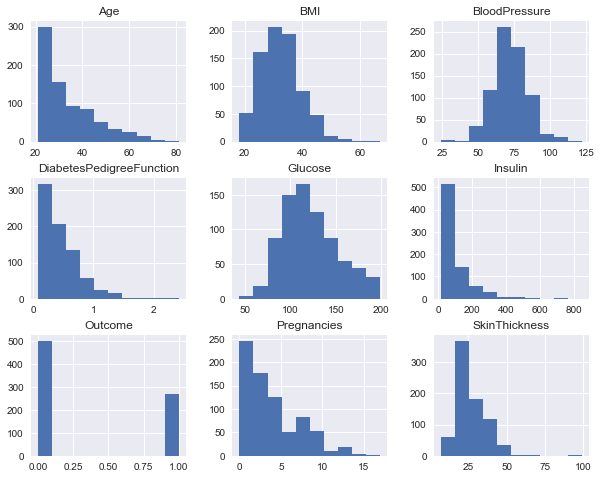

In [319]:
#DataVisualization

filt_df = df[['SkinThickness','Insulin']]
#filt_df = df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction']]
#print(filt_df.head(10))
df.hist(figsize=(10,8))

Pregnancies                    Axes(0.125,0.657941;0.227941x0.222059)
Glucose                     Axes(0.398529,0.657941;0.227941x0.222059)
BloodPressure               Axes(0.672059,0.657941;0.227941x0.222059)
SkinThickness                  Axes(0.125,0.391471;0.227941x0.222059)
Insulin                     Axes(0.398529,0.391471;0.227941x0.222059)
BMI                         Axes(0.672059,0.391471;0.227941x0.222059)
DiabetesPedigreeFunction          Axes(0.125,0.125;0.227941x0.222059)
Age                            Axes(0.398529,0.125;0.227941x0.222059)
Outcome                        Axes(0.672059,0.125;0.227941x0.222059)
dtype: object

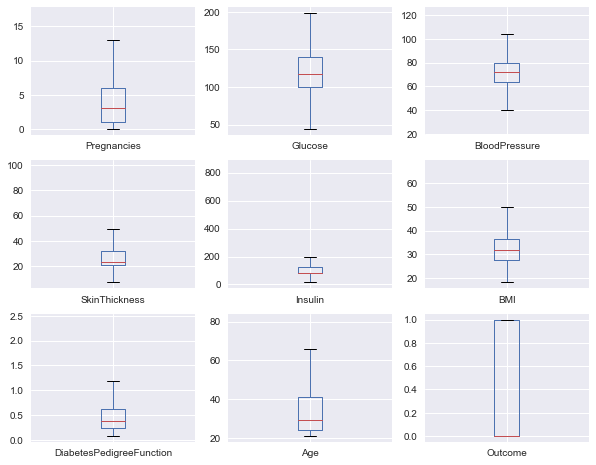

In [320]:
df.plot(kind= 'box' , subplots=True, layout=(3,3), sharex=False, sharey=False, figsize=(10,8))

In [321]:
#print (data.describe())
#Outlier removal & Visualization
low = .1
high = .9
quant_df = filt_df.quantile([low, high])
print(quant_df)

filt_df = filt_df.apply(lambda x: x[(x>quant_df.loc[low,x.name]) & (x < quant_df.loc[high,x.name])], axis=0)

#filt_df.dropna(axis=0, how='any',inplace=True)
print("*******after outlier removal*********")
#filt_df.describe()

#df['Glucose']=filt_df['Glucose']
#df['BloodPressure']=filt_df['BloodPressure']
df['SkinThickness']=filt_df['SkinThickness']
df['Insulin']=filt_df['Insulin']
#df['BMI']=filt_df['BMI']
#df['DiabetesPedigreeFunction']=filt_df['DiabetesPedigreeFunction']

df.dropna(axis=0, how='any',inplace=True)

df.describe()
#df.hist(figsize=(10,8))

#df.hist(figsize=(10,8))
#from scipy import stats
#df[(np.abs(stats.zscore(df)) < 1.5).all(axis=1)]

#df[np.abs(df.Glucose-df.Glucose.mean())<=(1.5*df.Glucose.std())]
#df[np.abs(df.BloodPressure-df.BloodPressure.mean())<=(3*df.BloodPressure.std())]
#df[np.abs(df.SkinThickness-df.SkinThickness.mean())<=(3*df.SkinThickness.std())]
#df[np.abs(df.Insulin-df.Insulin.mean())<=(3*df.Insulin.std())]
#df[np.abs(df.BMI-df.BMI.mean())<=(1.5*df.BMI.std())]
#df[np.abs(df.DiabetesPedigreeFunction-df.DiabetesPedigreeFunction.mean())<=(3*df.DiabetesPedigreeFunction.std())]
#df.hist(figsize=(10,8))
#chkColumnForVal("BMI",10)

     SkinThickness  Insulin
0.1           18.0     67.0
0.9           40.0    210.0
*******after outlier removal*********


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000
mean,4.216867,121.404987,72.533517,25.091920,95.674746,32.056663,0.450902,34.650602,0.369478
std,3.411007,29.085953,11.732471,5.909335,32.059872,6.102319,0.322686,11.888077,0.483149
min,0.000000,44.000000,30.000000,19.000000,68.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,101.000000,65.250000,20.536458,79.799479,27.625000,0.233000,25.000000,0.000000
50%,4.000000,117.000000,72.000000,20.536458,79.799479,31.992578,0.340000,31.000000,0.000000
75%,6.000000,138.750000,80.000000,30.000000,91.750000,35.700000,0.591000,42.000000,1.000000
max,15.000000,197.000000,122.000000,39.000000,207.000000,52.900000,2.288000,72.000000,1.000000


Pregnancies                    Axes(0.125,0.657941;0.227941x0.222059)
Glucose                     Axes(0.398529,0.657941;0.227941x0.222059)
BloodPressure               Axes(0.672059,0.657941;0.227941x0.222059)
SkinThickness                  Axes(0.125,0.391471;0.227941x0.222059)
Insulin                     Axes(0.398529,0.391471;0.227941x0.222059)
BMI                         Axes(0.672059,0.391471;0.227941x0.222059)
DiabetesPedigreeFunction          Axes(0.125,0.125;0.227941x0.222059)
Age                            Axes(0.398529,0.125;0.227941x0.222059)
Outcome                        Axes(0.672059,0.125;0.227941x0.222059)
dtype: object

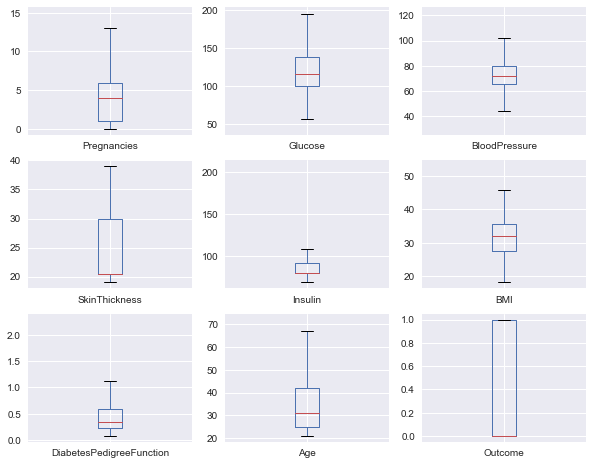

In [322]:
df.plot(kind= 'box' , subplots=True, layout=(3,3), sharex=False, sharey=False, figsize=(10,8))

In [323]:
#Categorise continuous variables
#Pregnancies 
'''
bins_Pregnancies=3
df["Pregnancies"] = pd.cut(df.Pregnancies,bins_Pregnancies,labels=False)

#labels_Glucose = ["NorGlucose","MedGlucose","HigGlucose"]
#pd.cut([5,139,140,141,145,199,200,201],bins_Glucose,labels=labels_Glucose)
#Glucose- (0,139], (139,199] , (199,1000]
bins_Glucose = [0.0,139.0,199.0,1000.0]
df["Glucose"] = pd.cut(df.Glucose,bins_Glucose,labels=False)

#BP-(0,59], (59,90] , (90,200] or <60, 60-90, >90
bins_BP = [0.00,59.00,90.00,200.00]
df["BloodPressure"] = pd.cut(df.BloodPressure,bins_BP,labels=False)

#SkinThickness -(0,23],(23,200]
bins_SkinThickness = [0.0,23.0,200.0]
df["SkinThickness"] = pd.cut(df.SkinThickness,bins_SkinThickness,labels=False)

#Insulin -(0,15],(15,166),(166,1000]
bins_Insulin=[0.0,15.0,166.0,1000.0]
df["Insulin"] = pd.cut(df.Insulin,bins_Insulin,labels=False)

#BMI - (0,18.4], (18.4,24], (24,29], (29,100] 
bins_BMI=(0.0,18.4,24.0,29.0,100.0)
df["BMI"] = pd.cut(df.BMI,bins_BMI,labels=False)

#DiabetesPedigreeFunction use equidistant bins
bins_DPF=3
df["DiabetesPedigreeFunction"] = pd.cut(df.DiabetesPedigreeFunction,bins_DPF,labels=False)

#Age (20,44],(44,64],(64,100]
bins_Age=(20.0,44.0,64.0,100.0)
df["Age"] = pd.cut(df.Age,bins_Age,labels=False)

print(df.head(20))
'''

'\nbins_Pregnancies=3\ndf["Pregnancies"] = pd.cut(df.Pregnancies,bins_Pregnancies,labels=False)\n\n#labels_Glucose = ["NorGlucose","MedGlucose","HigGlucose"]\n#pd.cut([5,139,140,141,145,199,200,201],bins_Glucose,labels=labels_Glucose)\n#Glucose- (0,139], (139,199] , (199,1000]\nbins_Glucose = [0.0,139.0,199.0,1000.0]\ndf["Glucose"] = pd.cut(df.Glucose,bins_Glucose,labels=False)\n\n#BP-(0,59], (59,90] , (90,200] or <60, 60-90, >90\nbins_BP = [0.00,59.00,90.00,200.00]\ndf["BloodPressure"] = pd.cut(df.BloodPressure,bins_BP,labels=False)\n\n#SkinThickness -(0,23],(23,200]\nbins_SkinThickness = [0.0,23.0,200.0]\ndf["SkinThickness"] = pd.cut(df.SkinThickness,bins_SkinThickness,labels=False)\n\n#Insulin -(0,15],(15,166),(166,1000]\nbins_Insulin=[0.0,15.0,166.0,1000.0]\ndf["Insulin"] = pd.cut(df.Insulin,bins_Insulin,labels=False)\n\n#BMI - (0,18.4], (18.4,24], (24,29], (29,100] \nbins_BMI=(0.0,18.4,24.0,29.0,100.0)\ndf["BMI"] = pd.cut(df.BMI,bins_BMI,labels=False)\n\n#DiabetesPedigreeFunction 

In [324]:
#step3 divide the dataset into training - 30%, tuneing -30% and testing 40%
train, test = train_test_split(df, test_size = 0.4, random_state=30)
target = train["Outcome"]
feature = train[train.columns[0:8]]
feat_names = train.columns[0:8]
target_classes = ['0','1'] 
print(test)

     Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
25            10  125.000000      70.000000      26.000000  115.000000   
362            5  103.000000     108.000000      37.000000   79.799479   
151            4  114.000000      65.000000      20.536458   79.799479   
418            1   83.000000      68.000000      20.536458   79.799479   
26             7  147.000000      76.000000      20.536458   79.799479   
40             3  180.000000      64.000000      25.000000   70.000000   
731            8  120.000000      86.000000      20.536458   79.799479   
430            2   99.000000      69.105469      20.536458   79.799479   
435            0  141.000000      69.105469      20.536458   79.799479   
146            9   57.000000      80.000000      37.000000   79.799479   
697            0   99.000000      69.105469      20.536458   79.799479   
560            6  125.000000      76.000000      20.536458   79.799479   
238            9  164.000000      84.0

             precision    recall  f1-score   support

          0       0.77      0.87      0.82       126
          1       0.72      0.57      0.64        74

avg / total       0.76      0.76      0.75       200

[[110  16]
 [ 32  42]]
Decision Tree accuracy:  0.76
Axes(0.125,0.125;0.62x0.755)
DecisionTree Feature ranking:
1. feature Glucose (0.558787)
2. feature BMI (0.260081)
3. feature Pregnancies (0.134401)
4. feature Age (0.036539)
5. feature Insulin (0.010191)
6. feature DiabetesPedigreeFunction (0.000000)
7. feature SkinThickness (0.000000)
8. feature BloodPressure (0.000000)


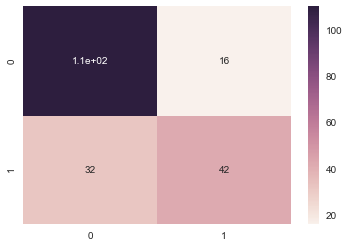

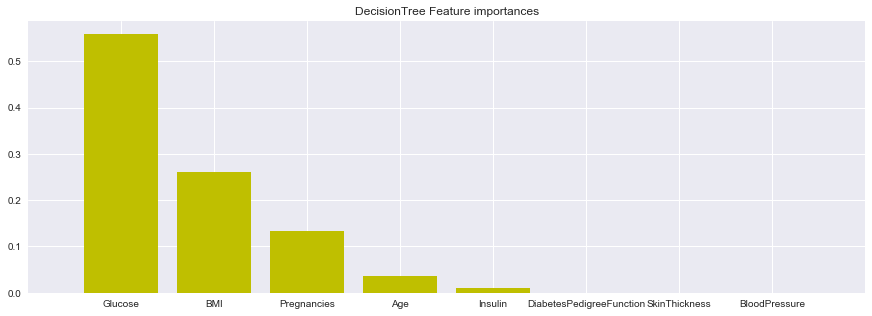

In [325]:
#step4 use training dataset to apply algorithm 
import seaborn as sns
model = DecisionTreeClassifier(max_depth=4, random_state=0)
tree_= model.fit(feature,target)
test_input=test[test.columns[0:8]]
expected = test["Outcome"]
#print("*******************Input******************")
#print(test_input.head(2))
#print("*******************Expected******************")
#print(expected.head(2))
predicted = model.predict(test_input)
print(metrics.classification_report(expected, predicted))
conf = metrics.confusion_matrix(expected, predicted)
print(conf)
print("Decision Tree accuracy: ",model.score(test_input,expected))
dtreescore = model.score(test_input,expected)


label = ["0","1"]
sns.heatmap(conf, annot=True, xticklabels=label, yticklabels=label)
print (a)

#Feature Importance DecisionTreeClassifier
importance = model.feature_importances_
indices = np.argsort(importance)[::-1]
print("DecisionTree Feature ranking:")
for f in range(feature.shape[1]):
    print("%d. feature %s (%f)" % (f + 1, feat_names[indices[f]], importance[indices[f]]))
plt.figure(figsize=(15,5))
plt.title("DecisionTree Feature importances")
plt.bar(range(feature.shape[1]), importance[indices], color="y", align="center")
plt.xticks(range(feature.shape[1]), feat_names[indices])
plt.xlim([-1, feature.shape[1]])
plt.show()


In [326]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=21)
neigh.fit(feature,target)
knnpredicted = neigh.predict(test_input)
print(metrics.classification_report(expected, knnpredicted))
print(metrics.confusion_matrix(expected, knnpredicted))
print("KNN accuracy: ",neigh.score(test_input,expected))
knnscore=neigh.score(test_input,expected)

             precision    recall  f1-score   support

          0       0.75      0.82      0.78       126
          1       0.63      0.53      0.57        74

avg / total       0.70      0.71      0.70       200

[[103  23]
 [ 35  39]]
KNN accuracy:  0.71


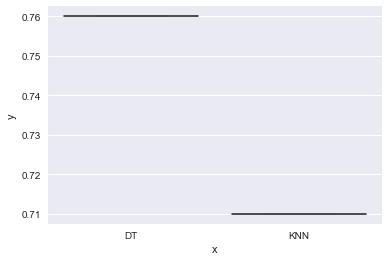

In [327]:

names_ = []
results_ = []
results_.append(dtreescore)
results_.append(knnscore)
names_.append("DT")
names_.append("KNN")

#ax.set_xticklabels(names)
res = pd.DataFrame()
res['y']=results_
res['x']=names_
ax = sns.boxplot(x='x',y='y',data=res)

digraph Tree {
node [shape=box, style="filled, rounded", color="black", fontname=helvetica] ;
edge [fontname=helvetica] ;
0 [label=<Glucose &le; 154.5<br/>gini = 0.4657<br/>samples = 298<br/>value = [188, 110]<br/>class = 0>, fillcolor="#e581396a"] ;
1 [label=<BMI &le; 26.3<br/>gini = 0.4178<br/>samples = 259<br/>value = [182, 77]<br/>class = 0>, fillcolor="#e5813993"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label=<gini = 0.0<br/>samples = 46<br/>value = [46, 0]<br/>class = 0>, fillcolor="#e58139ff"] ;
1 -> 2 ;
3 [label=<Glucose &le; 99.5<br/>gini = 0.4616<br/>samples = 213<br/>value = [136, 77]<br/>class = 0>, fillcolor="#e581396f"] ;
1 -> 3 ;
4 [label=<Age &le; 42.5<br/>gini = 0.1827<br/>samples = 59<br/>value = [53, 6]<br/>class = 0>, fillcolor="#e58139e2"] ;
3 -> 4 ;
5 [label=<gini = 0.0783<br/>samples = 49<br/>value = [47, 2]<br/>class = 0>, fillcolor="#e58139f4"] ;
4 -> 5 ;
6 [label=<gini = 0.48<br/>samples = 10<br/>value = [6, 4]<br/>class = 0>, fillco

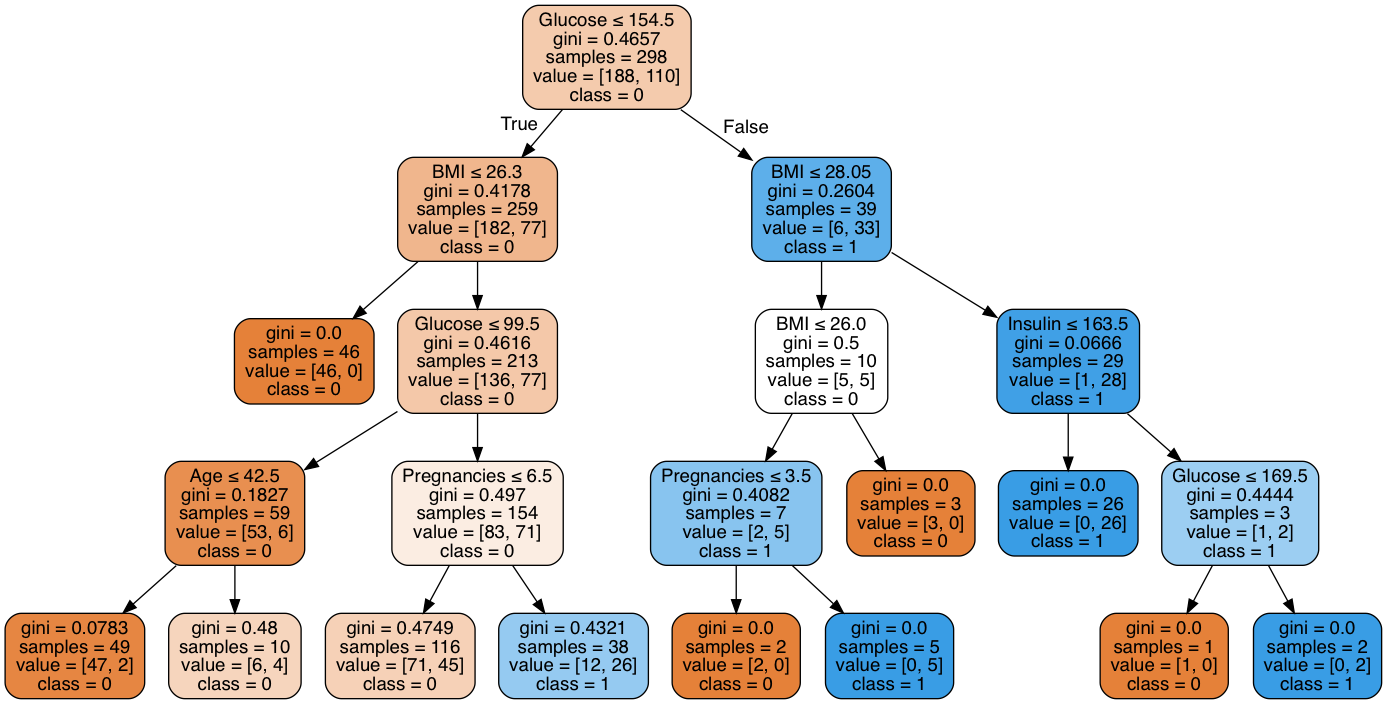

In [328]:
import graphviz 
import pydotplus
from IPython.display import Image
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
dot_data=StringIO()
dot_data = export_graphviz(model, out_file = None, feature_names=feat_names, class_names=target_classes, 
                filled=True, rounded=True, special_characters=True) 

graph = pydotplus.graph_from_dot_data(dot_data)
print(dot_data)
Image(graph.create_png())
#graph.write_pdf("diabetes.pdf") 

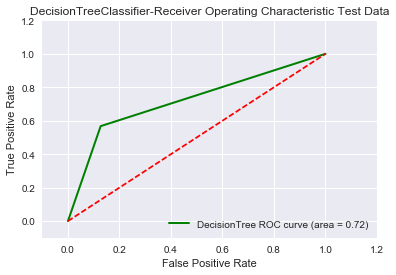

In [329]:
#Evaluation DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc
import random

fpr,tpr,thres = roc_curve(expected, predicted)
roc_auc = auc(fpr, tpr)
plt.title('DecisionTreeClassifier-Receiver Operating Characteristic Test Data')
plt.plot(fpr, tpr, color='green', lw=2, label='DecisionTree ROC curve (area = %0.2f)' % roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

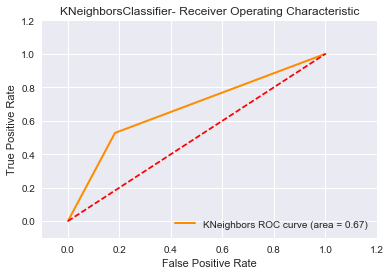

In [330]:
#KNeighborsClassifier-ROC curve
kfpr,ktpr,kthres = roc_curve(expected, knnpredicted)
kroc_auc = auc(kfpr, ktpr)
plt.title('KNeighborsClassifier- Receiver Operating Characteristic')
plt.plot(kfpr, ktpr, color='darkorange', lw=2, label='KNeighbors ROC curve (area = %0.2f)' % kroc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()